In [1]:
import matplotlib.pyplot as plt
import numpy as np
import models
import boundary_conditions as bc
import plotting

%matplotlib notebook

<IPython.core.display.Javascript object>


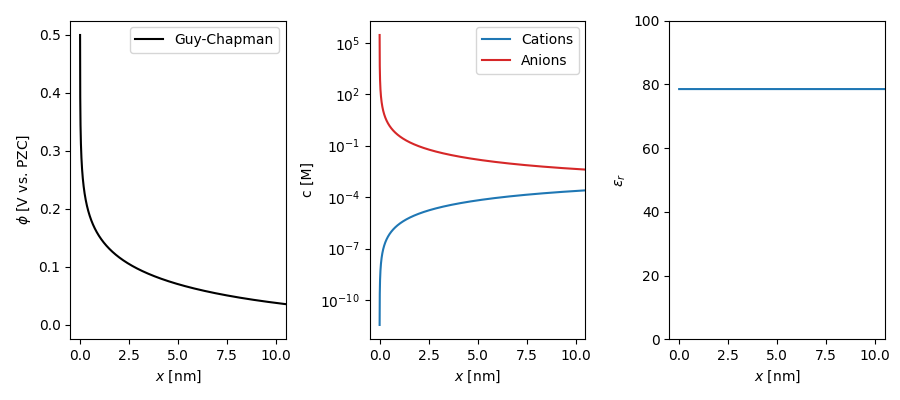

In [2]:
concentration_M = 1e-3

x = models.get_x_axis_nm(100, 1000)

gc_bc = bc.GuyChapmanDirichlet(phi_0=0.5)
gc_sol = models.solve_spatial_profile_gc(x, concentration_M, gc_bc)

fig, ax = plotting.plot_solution(gc_sol, -0.5, 10.5)
plt.show()